# Perdidos en el espacio

Imagina que en el futuro una nave espacial tripulada parte de la Tierra hacia el planeta Neptuno.

Durante el viaje, la tripulación permanece en estado de animación suspendida. En el trayecto la nave
sufre una grave avería y el sistema automático de control la dirige al cuerpo celeste más cercano,
donde realiza un aterrizaje de emergencia. Al posarse sobre la superficie, el sistema de soporte vital
de la nave reanima a la tripulación.

Una vez despiertos, los tripulantes descubren que el sistema de posicionamiento espacial no
funciona y por el momento no tienen comunicación con la Tierra ni pueden mirar al exterior de la
nave por razones de seguridad. Así que no saben dónde están, no tienen ningún dato del exterior,
ni posibilidad de conseguirlo, ni saben cuánto tiempo ha pasado.

En su trayecto entre la Tierra y Neptuno han podido estar cerca de la propia Tierra, Marte, Júpiter,
Saturno, Urano, Neptuno y las lunas de cualquiera de ellos

In [80]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
from sklearn.preprocessing import LabelEncoder

# Datos Experimentales


In [81]:
import random
from faker import Faker

fake = Faker()

planet_g_values = {
    'Tierra': 9.8,
    'Marte': 3.7,
    'Júpiter': 24.8,
    'Saturno': 9.0,
    'Urano': 8.7,
    'Neptuno': 11.0
}

def generate_sample():
    L = round(random.uniform(0.8, 2.5), 2)
    t = round(random.uniform(0.4, 0.7), 2)
    g_calculated = round((2 * L) / (t**2), 2)
    
    g_diffs = {planet: abs(g_calculated - g) for planet, g in planet_g_values.items()}
 
    sorted_planets = sorted(g_diffs.keys(), key=lambda x: g_diffs[x])
    
    top_3_planets = sorted_planets[:3]

    return {
        "ID": fake.uuid4(),
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "g_calculado (m/s²)": g_calculated,
        "Planeta más probable": top_3_planets[0],
        "2do más probable": top_3_planets[1],
        "3ro más probable": top_3_planets[2]
    }

dataset = [generate_sample() for _ in range(500)]

for sample in dataset:
    print(sample)


{'ID': '2e4af9df-4f2e-453c-b4d2-c1512ab88f14', 'Longitud (m)': 0.95, 'Tiempo (s)': 0.44, 'g_calculado (m/s²)': 9.81, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno', '3ro más probable': 'Urano'}
{'ID': 'b180207b-0478-46a0-a5b9-c48b2f5b3f7b', 'Longitud (m)': 2.22, 'Tiempo (s)': 0.47, 'g_calculado (m/s²)': 20.1, 'Planeta más probable': 'Júpiter', '2do más probable': 'Neptuno', '3ro más probable': 'Tierra'}
{'ID': '4619787b-d2ac-4e55-b8c6-3b20e01ed64b', 'Longitud (m)': 2.18, 'Tiempo (s)': 0.66, 'g_calculado (m/s²)': 10.01, 'Planeta más probable': 'Tierra', '2do más probable': 'Neptuno', '3ro más probable': 'Saturno'}
{'ID': '9c948705-ded9-4bc2-b8e8-bc908064a307', 'Longitud (m)': 1.48, 'Tiempo (s)': 0.7, 'g_calculado (m/s²)': 6.04, 'Planeta más probable': 'Marte', '2do más probable': 'Urano', '3ro más probable': 'Saturno'}
{'ID': '72f68e4c-f216-45ef-b38c-fab4b572a3f4', 'Longitud (m)': 0.94, 'Tiempo (s)': 0.44, 'g_calculado (m/s²)': 9.71, 'Planeta más probable': 'Tierra', '2

In [82]:
csv_filename = "planet_dataset.csv"
df = pd.DataFrame(dataset)
df.to_csv(csv_filename, index=False)

In [83]:
filepath = "planet_dataset.csv"
data_frame = pd.read_csv(filepath)

data_frame.head(500)

,ID,Longitud (m),Tiempo (s),g_calculado (m/s²),Planeta más probable,2do más probable,3ro más probable
0,2e4af9df-4f2e-453c-b4d2-c1512ab88f14,0.95,0.44,9.81,Tierra,Saturno,Urano
1,b180207b-0478-46a0-a5b9-c48b2f5b3f7b,2.22,0.47,20.10,Júpiter,Neptuno,Tierra
2,4619787b-d2ac-4e55-b8c6-3b20e01ed64b,2.18,0.66,10.01,Tierra,Neptuno,Saturno
3,9c948705-ded9-4bc2-b8e8-bc908064a307,1.48,0.70,6.04,Marte,Urano,Saturno
4,72f68e4c-f216-45ef-b38c-fab4b572a3f4,0.94,0.44,9.71,Tierra,Saturno,Urano
...,...,...,...,...,...,...,...
495,0dc543e8-7b1c-4ab3-a53d-4d0692d2d25e,0.99,0.48,8.59,Urano,Saturno,Tierra
496,d0d08e7a-13a1-4f8c-9cb7-0959691e644e,1.32,0.47,11.95,Neptuno,Tierra,Saturno
497,518f5de2-763b-44b0-9e70-be4069ecf51f,2.25,0.44,23.24,Júpiter,Neptuno,Tierra
498,db661f63-c052-4114-86de-e75ffc85fea2,1.20,0.48,10.42,Neptuno,Tierra,Saturno


# Fórmula: L = 1/2 x g x t^2

    A.- Con una longitud L= 1.00 m cronometran t = 0.46 s.

    ¿Cuánto vale g y su error?
 
    ¿En qué planeta están, o pueden estar?

In [84]:
import numpy as np

L = 1.00  # m
t = 0.46  # s
delta_L = 0.01  # m
delta_t = 0.01  # s

g = 2 * L / t**2

dg_dL = 2 / t**2
dg_dt = -4 * L / t**3

delta_g = np.sqrt((dg_dL * delta_L)**2 + (dg_dt * delta_t)**2)

g, delta_g

df = pd.DataFrame({'Aceleración de la gravedad medida (g)': [g],
                   'Error en la medición de g': [delta_g]})

print(df)

   Aceleración de la gravedad medida (g)  Error en la medición de g
0                               9.451796                   0.421677


Dado que g = 9.45 m/s^2 + - 0.42 m/s², podemos calcular el rango de valores posibles para g:

Rango inferior: 9.45 - 0.42 = 9.03 m/s^2

Rango superior: 9.45 + 0.42 = 9.87 m/s^2

Teniendo en cuenta los datos de la tabla, podemos saber que la tripulación podría estar en:

Saturno (g = 9.0 m/s^2) ya que 9.0 está dentro del rango de 9.03 a 9.87 m/s^2.

Tierra (g = 9.8 m/s^2) ya que 9.8 también está dentro del rango de 9.03 a 9.87 m/s^2.

    B.- Con una longitud L=2.00 m cronometran t = 0.66 s.

    ¿Cuánto vale g y su error?

    ¿En qué planeta están, o pueden estar?
 
    ¿Con que probabilidad puedes afirmarlo?

In [85]:
L = 2.00  # m
t = 0.66  # s

g = 2 * L / t**2

dg_dL = 2 / t**2
dg_dt = -4 * L / t**3

delta_g = np.sqrt((dg_dL * delta_L)**2 + (dg_dt * delta_t)**2)

g, delta_g

df = pd.DataFrame({'Aceleración de la gravedad medida (g)': [g],
                   'Error en la medición de g': [delta_g]})

print(df)

   Aceleración de la gravedad medida (g)  Error en la medición de g
0                               9.182736                   0.282027


Ahora, podemos calcular el rango de valores posibles para g:

Rango inferior: 9.18 - 0.28 = 8.90 m/s^2
Rango superior: 9.18 + 0.28 = 9.46 m/s^2

Podemos concluir que la tripulación podría estar en:

Saturno (g = 9.0 m/s^2) ya que 9.0 está dentro del rango de 8.90 a 9.46 m/s^2.
Dado que solo Saturno se encuentra dentro del rango calculado, podemos afirmar con cierta confianza que la tripulación está en Saturno en este caso.

# Creación de un Dataset enfocado en Experimentos de Aceleración de Gravedad para determinar la ubicación de una nave espacial en Tierra o Saturno 

Ahora vamos a crear un dataset enfocado en los experimentos realizados en los planetas con mayores porcentajes de posibilidad de estar presentes. Estos experimentos se centran en la Tierra y Saturno, ya que, según los cálculos previos, estos dos planetas mostraron los valores de aceleración de la gravedad más cercanos a los obtenidos en los escenarios analizados.

Este dataset contendrá los datos de las longitudes y tiempos cronometrados de cada experimento, así como los valores de la aceleración de la gravedad calculados y los porcentajes de acierto para cada planeta. Al analizar estos datos, podremos obtener una mejor comprensión de las posibilidades de que la nave espacial se encuentre en la Tierra o en Saturno, y así tomar decisiones más informadas sobre cómo proceder en esta situación.

Al utilizar este enfoque centrado en los planetas con mayores probabilidades, esperamos que podamos obtener resultados más precisos y útiles para determinar la ubicación de la nave espacial y garantizar el éxito de la misión.

In [86]:
import random
fake = Faker()

def generate_sample():
    L = round(random.uniform(0.8, 2.5), 2)
    t = round(random.uniform(0.4, 0.7), 2)
    g_calculated = round((2 * L) / (t**2), 2)
    most_probable_planet = "Tierra" if abs(g_calculated - 9.8) < abs(g_calculated - 9.0) else "Saturno"
    second_most_probable_planet = "Saturno" if most_probable_planet == "Tierra" else "Tierra"
    
    return {
        "ID": fake.uuid4(),
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "g_calculado (m/s²)": g_calculated,
        "Planeta más probable": most_probable_planet,
        "2do más probable": second_most_probable_planet
    }

dataset = [generate_sample() for _ in range(100)]

for sample in dataset:
    print(sample)



{'ID': '9cb0f2b7-d823-4e6b-82b9-c2dbcd82932f', 'Longitud (m)': 1.96, 'Tiempo (s)': 0.42, 'g_calculado (m/s²)': 22.22, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': 'f055758a-337b-4329-a03b-01b2b0dbceda', 'Longitud (m)': 1.22, 'Tiempo (s)': 0.43, 'g_calculado (m/s²)': 13.2, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': 'cd887b89-9081-4a04-9077-22088883cd5a', 'Longitud (m)': 2.07, 'Tiempo (s)': 0.56, 'g_calculado (m/s²)': 13.2, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': '63d0fc8b-8dad-4432-861c-035940f7a469', 'Longitud (m)': 2.03, 'Tiempo (s)': 0.65, 'g_calculado (m/s²)': 9.61, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': 'ef497e03-92c5-4a08-a264-d45943de4034', 'Longitud (m)': 2.32, 'Tiempo (s)': 0.68, 'g_calculado (m/s²)': 10.03, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': 'bc8de107-e453-4162-9f00-2aaee5879168', 'Longitud (m)': 1.3, 'Tiempo (s)': 0.43, 

In [87]:
data_frame = pd.DataFrame(dataset)
data_frame.to_csv("generated_dataset.csv", index=False)


In [88]:
filepath = "generated_dataset.csv"
data_frame = pd.read_csv(filepath)

data_frame.head(100)


,ID,Longitud (m),Tiempo (s),g_calculado (m/s²),Planeta más probable,2do más probable
0,9cb0f2b7-d823-4e6b-82b9-c2dbcd82932f,1.96,0.42,22.22,Tierra,Saturno
1,f055758a-337b-4329-a03b-01b2b0dbceda,1.22,0.43,13.20,Tierra,Saturno
2,cd887b89-9081-4a04-9077-22088883cd5a,2.07,0.56,13.20,Tierra,Saturno
3,63d0fc8b-8dad-4432-861c-035940f7a469,2.03,0.65,9.61,Tierra,Saturno
4,ef497e03-92c5-4a08-a264-d45943de4034,2.32,0.68,10.03,Tierra,Saturno
...,...,...,...,...,...,...
95,20a219f8-67ed-4f6d-bce6-578c50972263,2.09,0.49,17.41,Tierra,Saturno
96,aad67dae-4f8a-43ce-8a22-dc2a1d62a8cc,0.94,0.56,5.99,Saturno,Tierra
97,e3986c0a-f423-4b3f-a752-69dd522fc965,1.62,0.61,8.71,Saturno,Tierra
98,7722bee9-813e-482e-8ba9-72ae2371c8bf,2.14,0.68,9.26,Saturno,Tierra


# Análisis Exploratorio de Datos para el experimento de Tierra y Saturno como pruebas para determinar la ubicación de la nave espacial

In [89]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
from sklearn.preprocessing import LabelEncoder

In [90]:
fake = Faker()

def generate_sample():
    L = round(random.uniform(0.8, 2.5), 2)
    t = round(random.uniform(0.4, 0.7), 2)
    g_calculated = round((2 * L) / (t**2), 2)
    most_probable_planet = "Tierra" if abs(g_calculated - 9.8) < abs(g_calculated - 9.0) else "Saturno"
    second_most_probable_planet = "Saturno" if most_probable_planet == "Tierra" else "Tierra"
    
    return {
        "ID": fake.uuid4(),
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "g_calculado (m/s²)": g_calculated,
        "Planeta más probable": most_probable_planet,
        "2do más probable": second_most_probable_planet
    }

dataset = [generate_sample() for _ in range(100)]


In [91]:
df = pd.DataFrame(dataset)

In [92]:
print(df.describe())

       Longitud (m)  Tiempo (s)  g_calculado (m/s²)
count    100.000000  100.000000          100.000000
mean       1.646800    0.540700           12.062000
std        0.472218    0.082795            4.983493
min        0.810000    0.400000            3.350000
25%        1.255000    0.470000            8.107500
50%        1.610000    0.535000           11.425000
75%        2.060000    0.602500           14.800000
max        2.480000    0.700000           24.990000


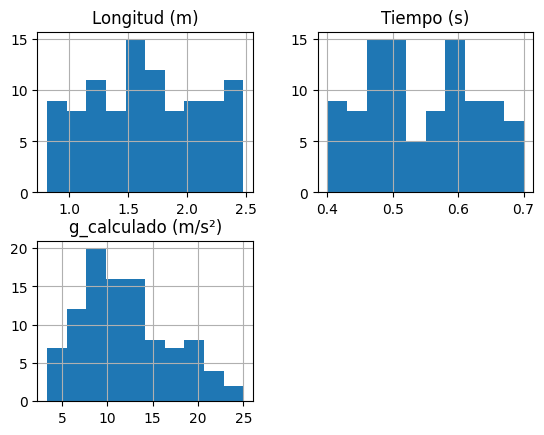

In [93]:
df.hist(column=["Longitud (m)", "Tiempo (s)", "g_calculado (m/s²)"])
plt.show()

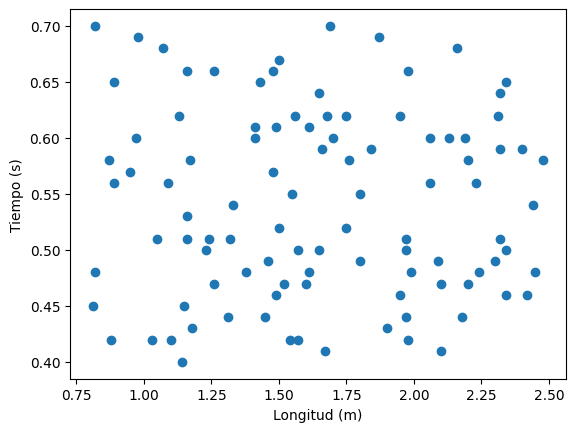

In [94]:
plt.scatter(df["Longitud (m)"], df["Tiempo (s)"])
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()

In [95]:
label_encoder = LabelEncoder()
df["Planeta más probable (código)"] = label_encoder.fit_transform(df["Planeta más probable"])
df["2do más probable (código)"] = label_encoder.fit_transform(df["2do más probable"])

In [96]:
print(df.corr())

                               Longitud (m)  Tiempo (s)  g_calculado (m/s²)  \
Longitud (m)                       1.000000   -0.018156            0.676133   
Tiempo (s)                        -0.018156    1.000000           -0.705613   
g_calculado (m/s²)                 0.676133   -0.705613            1.000000   
Planeta más probable (código)      0.531359   -0.614742            0.738755   
2do más probable (código)         -0.531359    0.614742           -0.738755   

                               Planeta más probable (código)  \
Longitud (m)                                        0.531359   
Tiempo (s)                                         -0.614742   
g_calculado (m/s²)                                  0.738755   
Planeta más probable (código)                       1.000000   
2do más probable (código)                          -1.000000   

                               2do más probable (código)  
Longitud (m)                                   -0.531359  
Tiempo (s)            

C:\Users\Claudia\AppData\Local\Temp\ipykernel_16212\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [99]:
from sklearn.linear_model import LinearRegression

X = df["Longitud (m)"].values.reshape(-1, 1)
y = df["Tiempo (s)"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

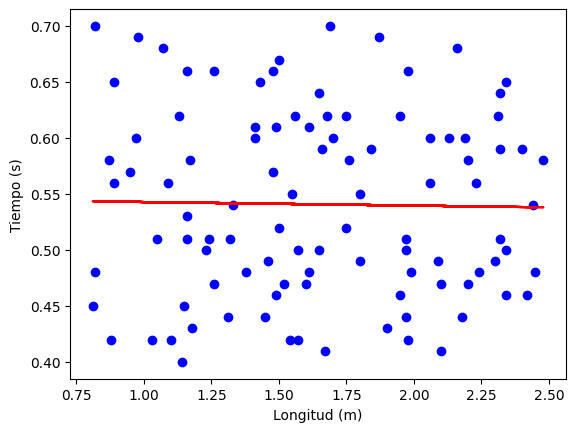

In [100]:
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="red")
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()